In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, mpld3, glob, os
import pandas as pd, seaborn as sn, numpy as np
sn.set_context('talk')

In [2]:
# Hack to force Python 2 to recognise utf-8 encodings. See here:
# http://jonathansoma.com/tutorials/international-data/python-and-utf-8/
# Note that using this breaks subsequent print statements in the 
# notebook, which is annoying!
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

# Exploring PW variances

Therese's e-mail received 28/10/2016 at 09:58 asks for comparisons of PW properies (conductivity, redox and pH) between the various krypsiv sites, preferably including a test for statistically significant differences.

I've copied the individual measurments for each year into a new speadsheet (`pore_water.xlsx`), which is used below. In principle, there are three measurements for each variable at each site in each year, so there should be 9 measurements in total for each parameter at each site (except where data are missing).

In [3]:
# Read XLS
in_xls = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data\Tidied\pore_water.xlsx'
df = pd.read_excel(in_xls, sheetname='data')

# Restructure
df = pd.melt(df, id_vars=['kortnavn', 'name', 'type', 
                          'id', 'pair', 'year'])
df['variable'] = df['variable'].apply(lambda x: x[3:-1])

df.head()

,kortnavn,name,type,id,pair,year,variable,value
0,LOG,LOG,Referanse,1,1,2014,Conductivity (µS/cm),NaN
1,ÅSE,ASE,Problemvekst,2,1,2014,Conductivity (µS/cm),17.2
2,SVE,SVE,Problemvekst,3,2,2014,Conductivity (µS/cm),50.0
3,SME,SME,Referanse,4,2,2014,Conductivity (µS/cm),56.0
4,FYG,FYG,Problemvekst,5,3,2014,Conductivity (µS/cm),16.3


The easiest way to present this data is using box plots. As a precursor to any formal statistical testing, we can create ["notched" box plots](https://en.wikipedia.org/wiki/Box_plot#Variations), to indicate the **95% confidence interval on the median**. This is usually done using the following formula

$$CI_{95} = median \pm \frac{1.58IQR}{\sqrt{n}}$$

However, this uses a Gaussian-based asymptotic approximation, which is probably not appropriate for this dataset. Instead, I've used **bootstrapping** with 1000 samples to estimate the CI. 

The way to read these plots is as follows:

 * If the notched regions are separated between the two groups, there is evidence for significantly different medians at the 95% confidence level. <br><br>
 * If the notched regions overlap, there is **no** evidence for significant differences.
 
This approach isn't as rigourous as some other statistical tests, but it's a good start, and if we find anything interesting we can always follow up with more detail later. We can also get an impression of any differences variability by comapring the IQR and whisker lengths for the different categories. 

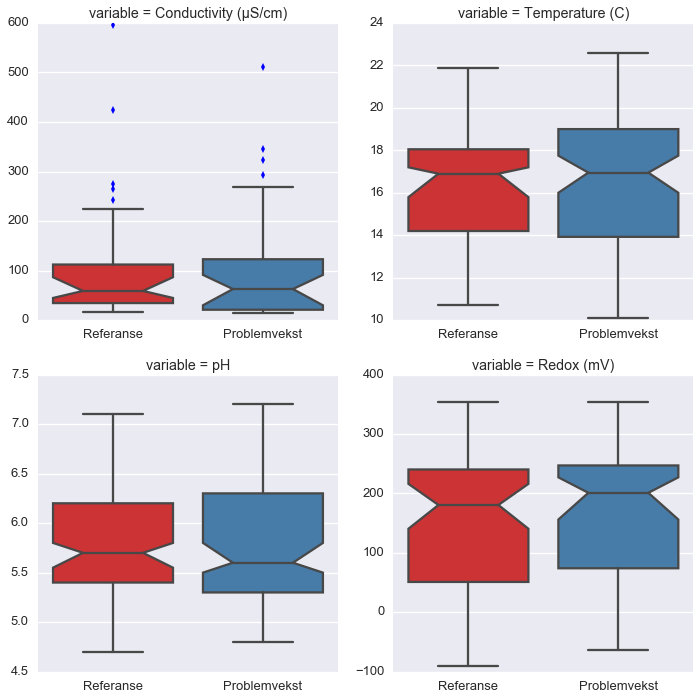

In [4]:
# Plot
g = sn.factorplot(x='type', y='value',
                  col='variable', col_wrap=2,
                  data=df, 
                  kind='box',
                  notch=True,
                  bootstrap=1000,
                  sharex=False,
                  sharey=False,
                  margin_titles=True,
                  palette='Set1',
                  size=5)

g.set(ylabel='')
g.set(xlabel='')
plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'replicates_1.png')
plt.savefig(out_path, dpi=300)

There is no evidence for significant ($p \le 0.05$) differences in the medians here, and the variabilities look pretty similar too. 

Another way to view the same data is to look at each site individually. On the plot below, I've arranged the sites along the x-axis so that they appear in pairs (`reference` and `problem`). There is still no evidence for significant differences in medians. What's more, because each box plot is based on a *maximum* of just 9 points, our ability to make reliable statistical inferences is fairly limited (this is why most of the plots look weird - the 95% CI on the median is wider than the IQR).

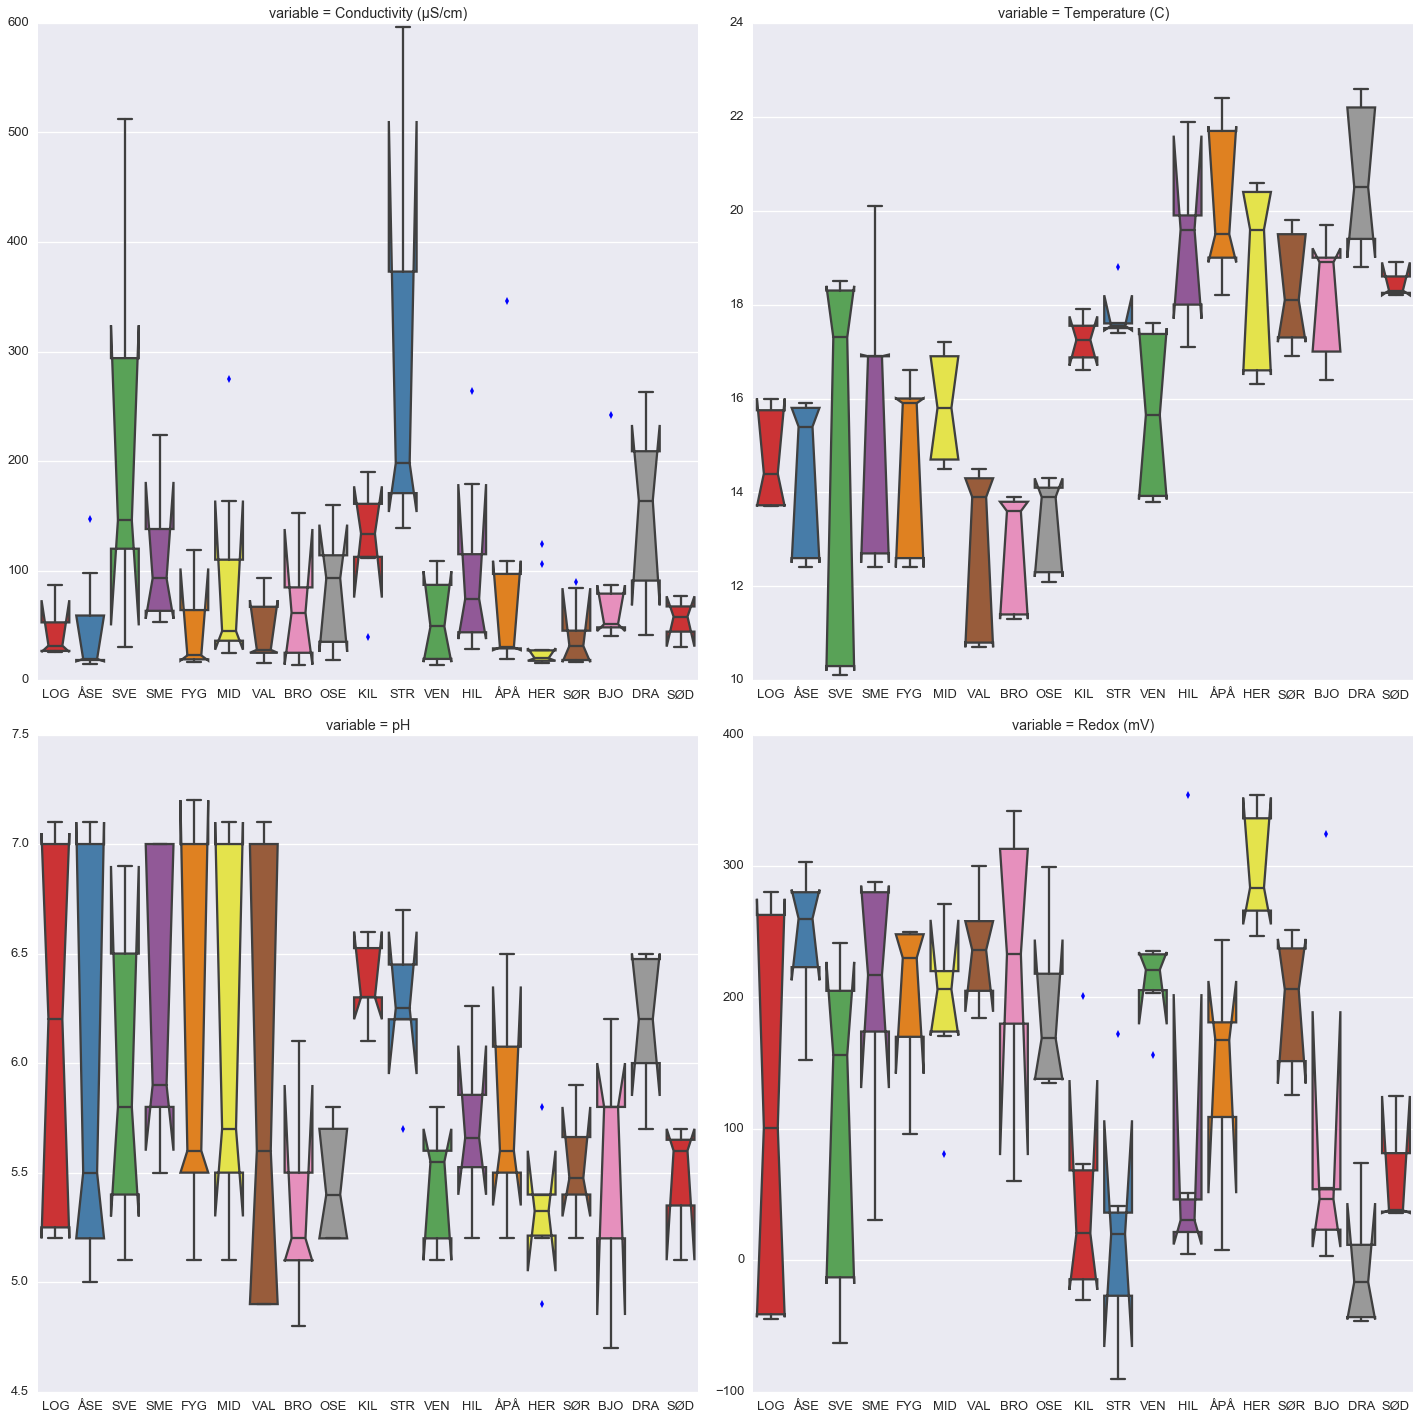

In [5]:
# Plot
g = sn.factorplot(x='kortnavn', y='value',
                  col='variable', col_wrap=2,
                  data=df, 
                  kind='box',
                  notch=True,
                  bootstrap=1000,
                  sharex=False,
                  sharey=False,
                  margin_titles=True,
                  palette='Set1',
                  size=10)
g.set(ylabel='')
g.set(xlabel='')
plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'replicates_2.png')
plt.savefig(out_path, dpi=300)

Another very similar plot can be created by explicitly pairing `reference` and `problem` locations along each river. This makes it easier to see which sites are `reference` and which are `problemvekst`.

| Kortnavn | ID |     Type     | Pair |
|:--------:|:--:|:------------:|:----:|
|    LOG   |  1 |   Referanse  |   1  |
|    ÅSE   |  2 | Problemvekst |   1  |
|    SVE   |  3 | Problemvekst |   2  |
|    SME   |  4 |   Referanse  |   2  |
|    FYG   |  5 | Problemvekst |   3  |
|    MID   |  6 |   Referanse  |   3  |
|    VAL   |  7 |   Referanse  |   4  |
|    BRO   |  8 | Problemvekst |   4  |
|    OSE   |  9 |   Referanse  |   5  |
|    KIL   | 11 | Problemvekst |   5  |
|    STR   | 10 |   Referanse  |   6  |
|    VEN   | 12 | Problemvekst |   6  |
|    HIL   | 13 |   Referanse  |   7  |
|    ÅPÅ   | 14 | Problemvekst |   7  |
|    HER   | 15 | Problemvekst |   8  |
|    SØR   | 17 |   Referanse  |   8  |
|    BJO   | 18 |   Referanse  |   9  |
|    DRA   | 19 | Problemvekst |   9  |

The plot below is identical to the one above, except this time the pairs are identifed along the x-axis, with the boxes labelled "Referanse" and "Problemvekst", respectively.

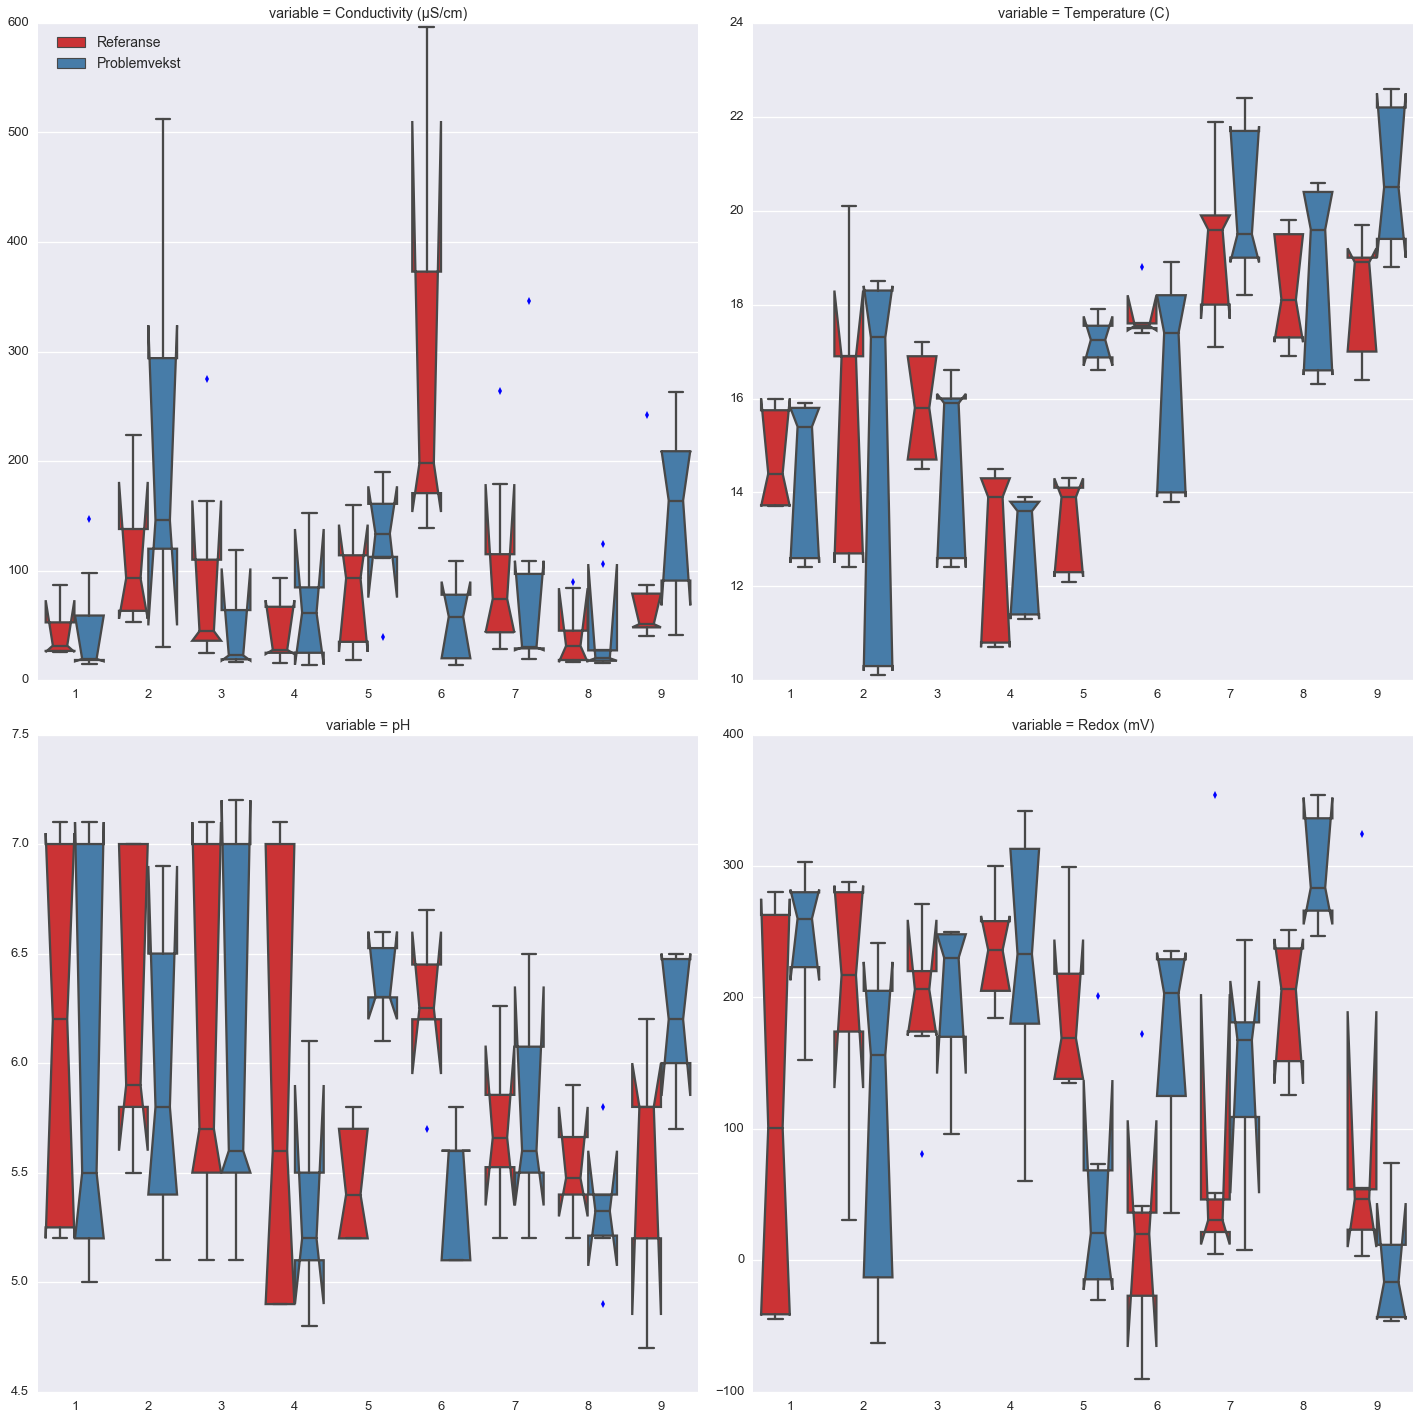

In [6]:
# Plot
g = sn.factorplot(x='pair', y='value', hue='type',
                  col='variable', col_wrap=2,
                  data=df, 
                  kind='box',
                  notch=True,
                  bootstrap=1000,
                  sharex=False,
                  sharey=False,
                  margin_titles=True,
                  palette='Set1',
                  size=10,
                  legend=False)
g.set(ylabel='')
g.set(xlabel='')
g.axes[0].legend(loc='upper left', bbox_to_anchor=(0.01, 1), 
                 fontsize=14)
plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'replicates_3.png')
plt.savefig(out_path, dpi=300)

Of all these plots, the very first is really the only one with sufficient data for meaningful inference. Based on this, there is currently no evidence for significant differences in medians between reference and problem sites. There is also no clear suggestion that reference sites have substantially different variability to problem sites: on the plot above, we see examples of both types of sites having high and low variability in different locations. To confirm this, we can calculate the **standard deviation** (the square root of the variance) for each parameter at each site and then consider box plots *of the variances*, split according to `reference` versus `problem` locations.

In [7]:
# Group by site and variable
grpd = pd.groupby(df, by=['name', 'type', 'variable'])

# Calc std. dev.
df2 = grpd.agg('std')
df2.reset_index(inplace=True)
df2['std_dev'] = df2['value']
del df2['id'], df2['pair'], df2['year'], df2['value']

df2.head(10)

,name,type,variable,std_dev
0,APA,Problemvekst,Conductivity (µS/cm),103.535885
1,APA,Problemvekst,Redox (mV),82.259751
2,APA,Problemvekst,Temperature (C),1.519868
3,APA,Problemvekst,pH,0.488535
4,ASE,Problemvekst,Conductivity (µS/cm),47.066150
5,ASE,Problemvekst,Redox (mV),46.912448
6,ASE,Problemvekst,Temperature (C),1.577533
7,ASE,Problemvekst,pH,0.900617
8,BJO,Referanse,Conductivity (µS/cm),63.526884
9,BJO,Referanse,Redox (mV),120.266371


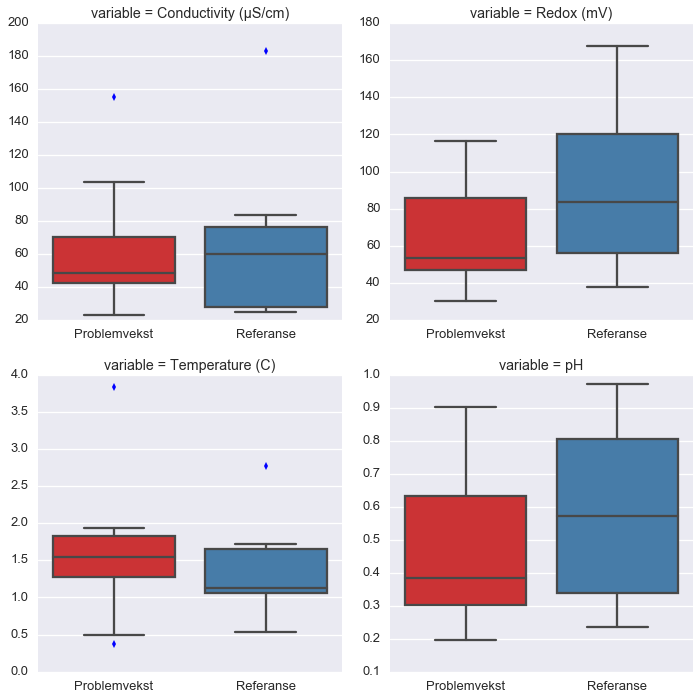

In [8]:
# Plot
g = sn.factorplot(x='type', y='std_dev',
                  col='variable', col_wrap=2,
                  data=df2, 
                  kind='box',
                  sharex=False,
                  sharey=False,
                  margin_titles=True,
                  palette='Set1',
                  size=5)

g.set(ylabel='')
g.set(xlabel='')
plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'replicates_4.png')
plt.savefig(out_path, dpi=300)

As expected, there is no clear evidence here of differences in standard deviation (i.e. variance). We could try something more sophisticated, but I'm not sure it's worth it without more data to charcaterise the within-site variation at each location.